<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/HW_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='7'>**–î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞**</font>  
<font color='#11a642' size='6'>**–¢–µ–º–∞: –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ. –ê–Ω—Å–∞–º–±–ª–∏ –º–æ–¥–µ–ª–µ–π**</font>  
<font size='5'>**–ó–∞–¥–∞–Ω–∏–µ:**</font>  

–î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ –æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∫–æ–Ω–∫—É—Ä—Å–∞ https://www.kaggle.com/competitions/playground-series-s5e5  

**–ß—Ç–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å:**

1. –ó–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞–Ω–Ω—ã–µ c –∫–æ–Ω–∫—É—Ä—Å–∞  https://www.kaggle.com/competitions/playground-series-s5e5
2. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∞–Ω—Å–∞–º–±–ª–∏ –º–æ–¥–µ–ª–µ–π


**–§–æ—Ä–º–∞ –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º—É:** —Å—Ç—Ä–æ–≥–æ —Ñ–∞–π–ª ipynb. –ü–µ—Ä–µ–¥ –∑–∞–≥—Ä—É–∑–∫–æ–π –µ—â–µ —Ä–∞–∑ –∑–∞–ø—É—Å—Ç–∏—Ç–µ –Ω–æ—É—Ç–±—É–∫, —É–±–µ–¥–∏–≤—à–∏—Å—å, —á—Ç–æ –≤—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –±–µ–∑ –æ—à–∏–±–æ–∫






# <font color='#11a642' size='6'> **–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫**

In [1]:
!pip install catboost -q

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import random


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (  # –ú–µ—Ç—Ä–∏–∫–∏ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    make_scorer,
)
from collections import Counter

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –≤ Pandas
pd.set_option('display.max_columns', 50)  # –û—Ç–æ–±—Ä–∞–∂–∞—Ç—å –¥–æ 50 —Å—Ç–æ–ª–±—Ü–æ–≤
pd.set_option('display.precision', 5)  # –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –î–§ —Å 5-—é –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π

In [3]:
# –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º —Å–∏–¥—ã

SEED = 127
np.random.seed(SEED)
random.seed(SEED)

In [4]:
# –ü–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Å –ø—Ä–æ—à–ª–æ–≥–æ –Ω–æ—É—Ç–±—É–∫–∞

def memory_compression(df, use_category=True, use_float=True, exclude_columns=None):
    """
    –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –ø–∞–º—è—Ç–∏
    :param df: –∏—Å—Ö–æ–¥–Ω—ã–π –î–§
    :param use_category: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å —Å—Ç—Ä–æ–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é
    :param use_float: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å float –≤ –ø–æ–Ω–∏–∂–µ–Ω–Ω—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å
    :param exclude_columns: —Å–ø–∏—Å–æ–∫ –∫–æ–ª–æ–Ω–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å –∏–∑ –æ–±—Ä–∞–±–æ—Ç–∫–∏
    :return: —Å–∂–∞—Ç—ã–π –î–§
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024 ** 2
    for col in df.columns:

        if exclude_columns and col in exclude_columns:
            continue

        if str(df[col].dtype)[:4] in 'datetime':
            continue

        elif str(df[col].dtype) not in ('object', 'category'):
            col_min = df[col].min()
            col_max = df[col].max()
            if str(df[col].dtype)[:3] == 'int':
                if col_min > np.iinfo(np.int8).min and col_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min > np.iinfo(np.int16).min and col_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min > np.iinfo(np.int32).min and col_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif col_min > np.iinfo(np.int64).min and col_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            elif use_float and str(df[col].dtype)[:5] == 'float':
                if col_min > np.finfo(np.float16).min and col_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif (col_min > np.finfo(np.float32).min
                      and col_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

        elif use_category and str(df[col].dtype) == 'object':
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024 ** 2
    print(f'–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ '
          f'—Ä–∞–≤–µ–Ω {round(start_mem, 2)} –º–±.')
    print(f'–ö–æ–Ω–µ—á–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ '
          f'—Ä–∞–≤–µ–Ω {round(end_mem, 2)} –º–±.')
    print(f'–≠–∫–æ–Ω–æ–º–∏—è –ø–∞–º—è—Ç–∏ = {(1 - end_mem / start_mem):.1%}')
    return df


def rmsle(y_true, y_pred):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ Root Mean Squared Logarithmic Error
    :param y_true: y_true
    :param y_pred: y_pred
    :return: RMSLE
    """
    y_true = np.array(y_true)
    y_pred = np.maximum(0, np.array(y_pred))
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))


def get_metrics(y_true, y_pred):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ Root Mean Squared Logarithmic Error
    :param y_true: y_true
    :param y_pred: y_pred
    :return: –º–µ—Ç—Ä–∏–∫–∏
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmsle_ = rmsle(y_true, y_pred)
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2, 'rmsle': rmsle_}


def calculate_outliers(dfs, q_range=1.5):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –≤—ã–±—Ä–æ—Å–æ–≤ —á–µ—Ä–µ–∑ IQR
    :param dfs: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :param q_range: –¥–∏–∞–ø–∞–∑–æ–Ω IQR
    :return: –º–∞—Å–∫–∞ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
    """
    Q1 = dfs.quantile(0.25)
    Q3 = dfs.quantile(0.75)
    IQR = (Q3 - Q1) * q_range
    return (dfs < (Q1 - IQR)) | (dfs > (Q3 + IQR))


def train_valid_model(model_class, model_num, model_params, df_train, df_valid,
                      model_cols, target_col, target_log=False):
    """
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏
    :param model_class: –ú–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä—É—é –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
    :param model_num: –ü–æ—Ä—è–¥–∫–æ–≤—ã–π –Ω–æ–º–µ—Ä –º–æ–¥–µ–ª–∏
    :param model_params: –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
    :param df_train: –æ–±—É—á–∞—é—â–∏–π –î–§
    :param df_valid: –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –î–§
    :param model_cols: —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    :param target_col: —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    :param target_log: –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
    :return: –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å, –î–§ —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏, –°–µ—Ä–∏—è —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    X_train, y_train = df_train[model_cols], df_train[target_col]
    X_valid, y_valid = df_valid[model_cols], df_valid[target_col]

    model = model_class(**model_params, random_state=SEED)

    if target_log:
        # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
        model.fit(X_train, np.log1p(y_train))
        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –º–∞—Å—à—Ç–∞–± –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        y_pred_train = np.expm1(model.predict(X_train))
        y_pred_valid = np.expm1(model.predict(X_valid))
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)

    metrics_train = get_metrics(y_train, y_pred_train)
    metrics_valid = get_metrics(y_valid, y_pred_valid)

    metric_t = f'Train{model_num}'
    metric_v = f'Valid{model_num}'

    # –°–æ–∑–¥–∞–µ–º DataFrame
    metrics = pd.DataFrame({'Metric': list(metrics_train.keys()),
                            metric_t: list(metrics_train.values()),
                            metric_v: list(metrics_valid.values())})

    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É train –∏ valid (–≤ %)
    metrics[f'Diff{model_num},%'] = ((metrics[metric_v] - metrics[metric_t])
                                     / metrics[metric_t] * 100).round(2)
    return model, metrics, model.feature_importances_


def find_best_model(metrics_df):
    """
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
    :param metrics_df: –î–§ —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
    :return: None
    """
    models = []
    for idx, row in metrics_df.iterrows():
        metric_name = row['Metric']

        # –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –∫–æ–ª–æ–Ω–æ–∫ Valid*
        valid_cols = [col for col in metrics_df.columns if col.startswith('Valid')]
        valid_values = row[valid_cols]

        if metric_name.strip().lower() == 'r2':
            best_col = valid_values.idxmax()
            best_val = valid_values.max()
        else:
            best_col = valid_values.idxmin()
            best_val = valid_values.min()

        models.append(best_col)

        print(f"–ú–µ—Ç—Ä–∏–∫–∞: {metric_name:<5} --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_col} ({best_val:.4f})")

    result = Counter(models).most_common()[0]
    print('\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {} –Ω–∞ {} –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ {}'.format(*result, len(models)))


def find_depth(model_class, model_params, depths=range(4, 21, 2)):
    """
    –§—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ—ë –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤—å–µ–≤
    :param model_class: –ú–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä—É—é –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
    :param depths: –¥–∏–∞–ø–∞–∑–æ–Ω –ø–æ–∏—Å–∫–∞ –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤–∞
    :return: –û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞
    """
    train_rmse, valid_rmse = [], []
    for depth in depths:

        model_params['max_depth'] = depth

        _, metrics, _ = train_valid_model(model_class, 0, model_params,
                                          train, valid, model_columns, target)

        # –ü–æ–ª—É—á–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
        t_rmse, v_rmse = metrics[metrics['Metric'] == 'rmse'][['Train0', 'Valid0']].values[0]
        train_rmse.append(t_rmse)
        valid_rmse.append(v_rmse)

        print(f"Depth: {depth:2} | Train RMSE: {t_rmse:6.2f} | Valid RMSE: {v_rmse:6.2f}")

        # –†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞, –µ—Å–ª–∏ —Ç–µ–∫—É—â–∏–π RMSE > –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ,
        # –∏ –º–∏–Ω–∏–º—É–º –±—ã–ª —Ö–æ—Ç—è –±—ã 2 —à–∞–≥–∞ –Ω–∞–∑–∞–¥
        min_valid_rmse = min(valid_rmse)
        min_index = valid_rmse.index(min_valid_rmse)
        if len(valid_rmse) > min_index + 2 and valid_rmse[-1] > min_valid_rmse:
            print(f"\n–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞: –ª—É—á—à–∏–π Valid RMSE ({min_valid_rmse:.2f}) "
                  f"–±—ã–ª –Ω–∞ –≥–ª—É–±–∏–Ω–µ {depths[min_index]}")
            break

    plt.figure(figsize=(8, 5))
    plt.plot(depths[:len(train_rmse)], train_rmse, label='Train RMSE', marker='o')
    plt.plot(depths[:len(valid_rmse)], valid_rmse, label='Validation RMSE', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('RMSE')
    plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å RMSE –æ—Ç –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤–∞')
    plt.legend()
    plt.grid(True)
    plt.show()

    return depths[min_index]


def cv_params(model, param_grid, df_train, df_valid,
              model_cols, target_col, target_log=False, cv_folds=3):
    X_train, y_train = df_train[model_cols], df_train[target_col]
    X_valid, y_valid = df_valid[model_cols], df_valid[target_col]

    scoring = 'neg_root_mean_squared_error'

    opt_params = GridSearchCV(
        estimator=model,  # –ú–æ–¥–µ–ª—å
        param_grid=param_grid,  # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
        scoring=scoring,  # –°—Ç—Ä–∞—Ç–µ–≥–∏—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏
        cv=cv_folds,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ–ª–¥–æ–≤ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏–∏
        n_jobs=-1,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç–æ–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, -1 = –≤—Å–µ
        verbose=2,
    )

    if target_log:
        # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
        opt_params.fit(X_train, np.log1p(y_train))
    else:
        opt_params.fit(X_train, y_train)

    params = opt_params.best_params_

    print(f'Best score: {round(-opt_params.best_score_, 3)}\n')
    print(f'Best parameters: {params}')
    return params

### –í—ã–±–æ—Ä –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏–∏:
- `neg_mean_absolute_error` (MAE) - **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å**: MAE –∏–∑–º–µ—Ä—è–µ—Ç—Å—è –≤ —Ç–µ—Ö –∂–µ –µ–¥–∏–Ω–∏—Ü–∞—Ö, —á—Ç–æ –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (–∫–∞–ª–æ—Ä–∏–∏), —á—Ç–æ —É–¥–æ–±–Ω–æ –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –æ—à–∏–±–∫–∏ "–Ω–∞ –≥–ª–∞–∑". **–£—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –≤—ã–±—Ä–æ—Å–∞–º**: –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç MSE (–∫–≤–∞–¥—Ä–∞—Ç–∞ –æ—à–∏–±–∫–∏), MAE –º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º. **–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ**: –í `GridSearchCV` –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è `neg_MAE`, —Ç–∞–∫ –∫–∞–∫ sklearn –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É–µ—Ç –º–µ—Ç—Ä–∏–∫—É (—á–µ–º –±–ª–∏–∂–µ –∫ 0, —Ç–µ–º –ª—É—á—à–µ).
- `neg_mean_squared_error` (MSE) ‚Äì –µ—Å–ª–∏ –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏ –¥–æ–ª–∂–Ω—ã –Ω–∞–∫–∞–∑—ã–≤–∞—Ç—å—Å—è —Å–∏–ª—å–Ω–µ–µ.
- `neg_root_mean_squared_error` (RMSE) ‚Äì –∫–∞–∫ –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É MSE –∏ MAE.

–í—ã–±–µ—Ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–π –≤–∞—Ä–∏–∞–Ω—Ç `neg_root_mean_squared_error`.

# <font color='#11a642' size='6'> **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [5]:
try:
    df = pd.read_csv('https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C')
except:
    df = pd.read_csv('train_—Åalories.csv')

In [6]:
# –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –¥–∞–ª—å—à–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –º–æ–¥–µ–ª—å
df.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

–ù–∞ –ø—Ä–æ–≤–µ—Ä–∫–µ –ø—Ä–æ—à–ª–æ–π —Ä–∞–±–æ—Ç—ã –±—ã–ª —Ç–∞–∫–æ–π –≤–æ–ø—Ä–æ—Å: –ê –º–æ–∂–Ω–æ –ª–∏ —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å—é —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –≤—Å–µ –¥—É–±–ª–∏–∫–∞—Ç—ã - —ç—Ç–æ –¥—É–±–ª–∏–∫–∞—Ç—ã? –≤—ã –≤–µ–¥—å –Ω–µ –æ—Å—Ç–∞–≤–∏–ª–∏ –ø–æ–ª–µ —Å –∏–Ω–¥–µ–∫—Å–æ–º, –∫–æ—Ç–æ—Ä–æ–µ, –ø–æ –∏–¥–µ–µ, –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å PK —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –±–∏–∑–Ω–µ—Å —Å–º—ã—Å–ª–∞.

#### –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –ø–æ –¥—É–±–ª–∏–∫–∞—Ç–∞–º:

In [7]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —É–Ω–∏–∫–∞–ª—å–Ω–æ—Å—Ç—å –ò–î: —Å–æ–≤–ø–∞–¥–∞–µ—Ç –ª–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å—Ç—Ä–æ–∫ –≤ –î–§?

len(df) == df.id.nunique()

True

In [8]:
df.id.max()

749999

–ï—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –¥–∞–Ω–Ω—ã–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å –∫–∞–≥–≥–ª–∞ test.csv, —Å —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è, –æ—Ç–∫—É–¥–∞ –±—ã–ª –≤–∑—è—Ç —Ñ–∞–π–ª train_—Åalories.csv - —Ç–æ —Ç–∞–º –ò–î –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å 750000 –¥–æ 999999, —Ç.–µ. —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –∏–Ω–¥–µ–∫—Å –∏ –¥—É–±–ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –ø—Ä–∏–Ω–µ—Å—É—Ç –ø–æ–ª—å–∑—ã, —Ç.–∫. –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏ –∏ –≤–∞–ª–∏–∑–∞—Ü–∏–∏ –±—É–¥—É—Ç –∏—Å–∫–∞–∂–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏. –ò –¥–ª—è –∏–∑–±–µ–∂–∞–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö –≤ —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –∏—Ö —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å.

In [9]:
# –ö–æ–ª–æ–Ω–∫–∞ "id" –Ω–µ –Ω–µ—Å–µ—Ç —Å–º—ã—Å–ª–∞ - —ç—Ç–æ –∏–Ω–¥–µ–∫—Å
df.set_index("id", inplace=True)

## <font color='#11a642' size='5'> –†–æ–ª–∏ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [10]:
target = 'Calories'
# –í—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ (–≤–∫–ª—é—á–∞—è —Å—Ç—Ä–æ–∫–∏ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# –í—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# <font color='#11a642' size='6'> **–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**

<font color='#11a642' size='5'>
–û—Ü–µ–Ω–∏—Ç–µ —Ä–∞–∑–º–µ—Ä –≤–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞  

1.   –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
2.   –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤



In [11]:
# –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
df.memory_usage(deep=True).sum() / 1024 ** 3

np.float64(0.08801132626831532)

<font color='#11a642' size='5'>
–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è:

- –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ `df.info()`, `df.describe()`
- –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã, boxplot)
- –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (`df.corr()`)
- –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [13]:
# –°—á–∏—Ç–∞–µ–º —Ç—Ä–µ–±—É–µ–º—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
df[num_cols].agg(['min', 'max', 'mean', 'median']).T

min    max       mean  median
Age          20.0   79.0   41.42040    40.0
Height      126.0  222.0  174.69769   174.0
Weight       36.0  132.0   75.14567    74.0
Duration      1.0   30.0   15.42101    15.0
Heart_Rate   67.0  128.0   95.48399    95.0
Body_Temp    37.1   41.5   40.03625    40.3
Calories      1.0  314.0   88.28278    77.0

In [14]:
# –ö–æ–ª-–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
print(df.isnull().sum())

# –ö–æ–ª-–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:")
print(df.duplicated().sum())

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:
2841


In [15]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
df.drop_duplicates(inplace=True)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", df.duplicated().sum())

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0


In [16]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É –ø–æ—á—Ç–∏ –ø–æ—Ä–æ–≤–Ω—É.

df[cat_cols].value_counts(normalize=True)

Sex   
female    0.50095
male      0.49905
Name: proportion, dtype: float64

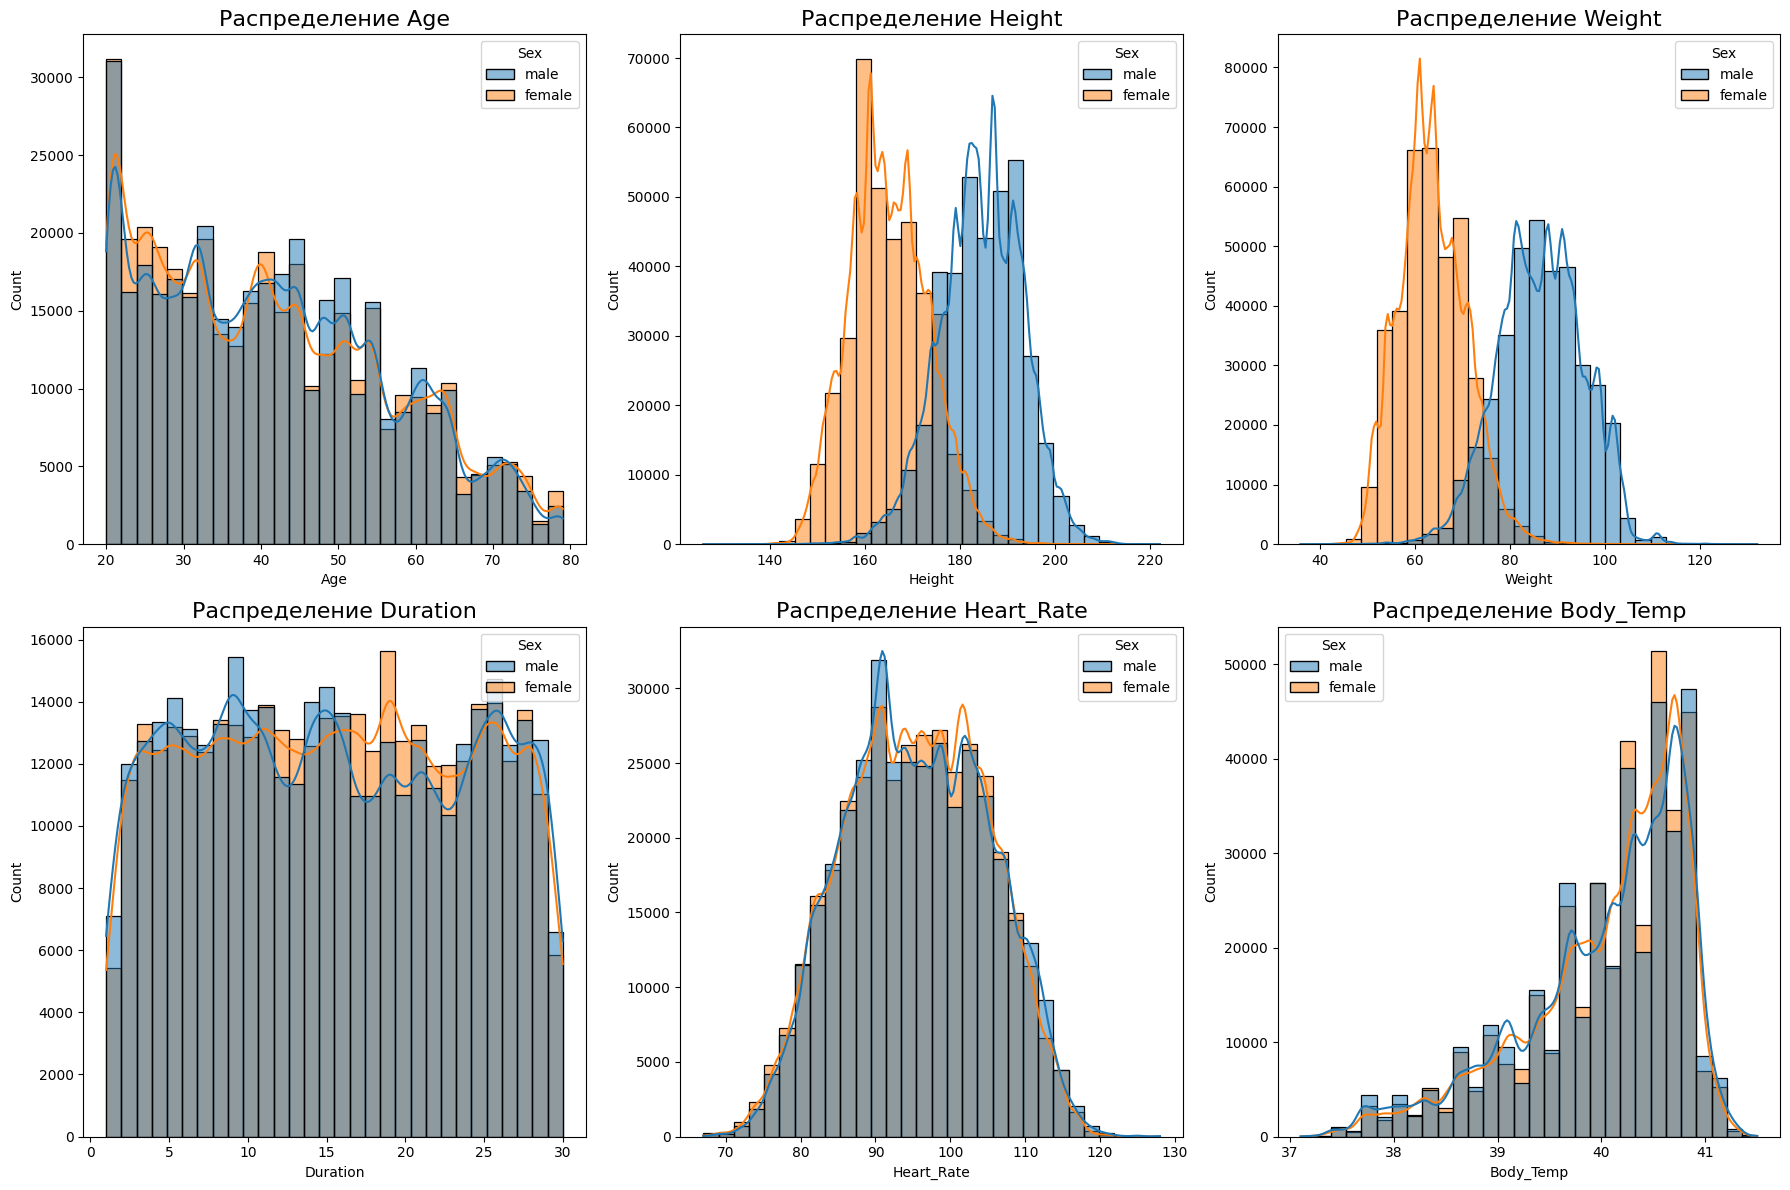

In [17]:
# —Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_cols = num_cols.copy()
numeric_cols.remove(target)

# –°–æ–∑–¥–∞–µ–º grid –≥—Ä–∞—Ñ–∏–∫–æ–≤
n_cols = 3  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='Sex', bins=30, kde=True, alpha=0.5)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}', fontsize=16)
    plt.grid(False)

plt.tight_layout()
plt.show()

–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —É—á—ë—Ç–æ–º **—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –ø–æ –ø–æ–ª—É**:

---

### üîπ **Age (–í–æ–∑—Ä–∞—Å—Ç)**

* **–Ø–≤–Ω–æ —Å–∫–æ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ —Å—Ç–æ—Ä–æ–Ω—É –º–æ–ª–æ–¥–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞**.
* –í—Å–ø–ª–µ—Å–∫ –Ω–∞ 20 –ª–µ—Ç ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, –±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –º–æ–ª–æ–¥—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∏–ª–∏ —ç—Ç–æ –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É.
* –ü–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ —É–±—ã–≤–∞–Ω–∏–µ —Å –ø–∏–∫–∞–º–∏ –Ω–∞ –∫—Ä—É–≥–ª—ã—Ö –¥–∞—Ç–∞—Ö (30, 40, 50‚Ä¶) ‚Äî **–≤–æ–∑–º–æ–∂–Ω—ã –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è –∏–ª–∏ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –ø—Ä–∏ –≤–≤–æ–¥–µ**.
* –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å—Ö–æ–∂–µ.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª–∏–∑–∞—Ü–∏—é –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å, –Ω–µ—Ç –ª–∏ "–∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤" (–Ω–∞–ø—Ä–∏–º–µ—Ä, 20 –ª–µ—Ç ‚Äî –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ –º–Ω–æ–≥–æ).

---

### üîπ **Height (–†–æ—Å—Ç)**

* –ú—É–∂—á–∏–Ω—ã (—Å–∏–Ω–∏–µ): –º–∞–∫—Å–∏–º—É–º –æ–∫–æ–ª–æ 178‚Äì180 —Å–º. –®–∏—Ä–æ–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –æ—Ç 160 –¥–æ 200+.
* –ñ–µ–Ω—â–∏–Ω—ã (–æ—Ä–∞–Ω–∂–µ–≤—ã–µ): –º–∞–∫—Å–∏–º—É–º –æ–∫–æ–ª–æ 160‚Äì165 —Å–º, –ª–µ–≤–µ–µ –∏ –∫–æ–º–ø–∞–∫—Ç–Ω–µ–µ.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —á—ë—Ç–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É, –∫–∞–∫ –æ–∂–∏–¥–∞–µ—Ç—Å—è. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∞–¥–µ–∫–≤–∞—Ç–Ω—ã, –Ω–æ **–∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ 140 —Å–º –∏ –≤—ã—à–µ 210 —Å–º** ‚Äî —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞–∫ –≤–æ–∑–º–æ–∂–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã.

---

### üîπ **Weight (–í–µ—Å)**

* –ê–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è –∫–∞—Ä—Ç–∏–Ω–∞: –º—É–∂—á–∏–Ω—ã —Ç—è–∂–µ–ª–µ–µ, –∂–µ–Ω—â–∏–Ω—ã –ª–µ–≥—á–µ.
* –¶–µ–Ω—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: –º—É–∂—á–∏–Ω—ã ‚Äî –æ–∫–æ–ª–æ 80 –∫–≥, –∂–µ–Ω—â–∏–Ω—ã ‚Äî 60 –∫–≥.
* –ù–µ–∫–æ—Ç–æ—Ä–∞—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è: —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å –≤–ø—Ä–∞–≤–æ (–æ—Å–æ–±–µ–Ω–Ω–æ —É –º—É–∂—á–∏–Ω).

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ 45 –∫–≥ –∏ –≤—ã—à–µ 120 –∫–≥ ‚Äî —Å—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –∫—Ä–∞–π–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–≥–ª—è–¥–∏—Ç —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ.

---

### üîπ **Duration (–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å)**

* –ü–æ—á—Ç–∏ **—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ** –æ—Ç 1 –¥–æ 30.
* –ü–æ–ª –Ω–µ –≤–ª–∏—è–µ—Ç ‚Äî –º—É–∂—Å–∫–∏–µ –∏ –∂–µ–Ω—Å–∫–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —ç—Ç–æ **–∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª** (–≤–æ–∑–º–æ–∂–Ω–æ, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–∫ –∏–ª–∏ —Å–µ–∞–Ω—Å–æ–≤). –ú–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å, –∏–ª–∏ –±–∏–Ω–∏–Ω–≥–æ–≤–∞—Ç–∏—Ç—å.

---

### üîπ **Heart\_Rate (–ü—É–ª—å—Å)**

* –ü—É–ª—å—Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω **–Ω–æ—Ä–º–∞–ª—å–Ω–æ**, —Å –ø–∏–∫–æ–º –æ–∫–æ–ª–æ 90‚Äì100 —É–¥/–º–∏–Ω.
* –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã —Å–Ω–æ–≤–∞ –ø–æ—Ö–æ–∂–∏.
* –í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –≤ 120‚Äì130 —É–¥/–º–∏–Ω ‚Äî **–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã –ø—Ä–∏ –Ω–∞–≥—Ä—É–∑–∫–µ**.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –ú–æ–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ ¬´–ø—É–ª—å—Å –≤—ã—à–µ 100¬ª –∏–ª–∏ ¬´–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã¬ª –¥–ª—è –º–µ–¥–∏—Ü–∏–Ω—ã/—Ñ–∏—Ç–Ω–µ—Å–∞.

---

### üîπ **Body\_Temp (–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ —Ç–µ–ª–∞)**

* –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ **–æ—Ç 37 –¥–æ 41.5¬∞C** ‚Äî –Ω–µ—Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã.
* –ü–∏–∫ —É 40‚Äì40.5¬∞C ‚Äî –∫—Ä–∞–π–Ω–µ –≤—ã—Å–æ–∫–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, **—á—Ç–æ-—Ç–æ –Ω–µ —Ç–∞–∫**:

  * –ª–∏–±–æ —ç—Ç–æ **—Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –ø–æ—Å–ª–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏** (–µ—Å–ª–∏ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –ø–æ –∫–æ–∂–µ –∏–ª–∏ –ø–æ–¥ –Ω–∞–≥—Ä—É–∑–∫–æ–π),
  * –ª–∏–±–æ **–µ–¥–∏–Ω–∏—Ü—ã –Ω–µ –¶–µ–ª—å—Å–∏–π**, –ª–∏–±–æ **–æ—à–∏–±–∫–∞ —Å–±–æ—Ä–∞**.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —Ç—Ä–µ–±—É–µ—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏. –°—Ä–µ–¥–Ω—è—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ —Ç–µ–ª–∞ —á–µ–ª–æ–≤–µ–∫–∞ ‚Äî **36.6‚Äì37.5¬∞C**, –∏ 40¬∞C ‚Äî —ç—Ç–æ —É–∂–µ –∫–ª–∏–Ω–∏—á–µ—Å–∫–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ.

---

### üü© –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:

‚úÖ **–•–æ—Ä–æ—à–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã**: `Age`, `Height`, `Weight`, `Heart_Rate`.

‚ö†Ô∏è **–ü—Ä–æ–≤–µ—Ä–∏—Ç—å:**

* `Body_Temp` ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —à–∫–∞–ª—ã –∏–ª–∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è.

* –°–¥–µ–ª–∞—Ç—å **–±–æ–∫—Å-–ø–ª–æ—Ç—ã** –¥–ª—è `Weight`, `Height`, `Body_Temp`, `Calories` ‚Äî –≤—ã—è–≤–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã.

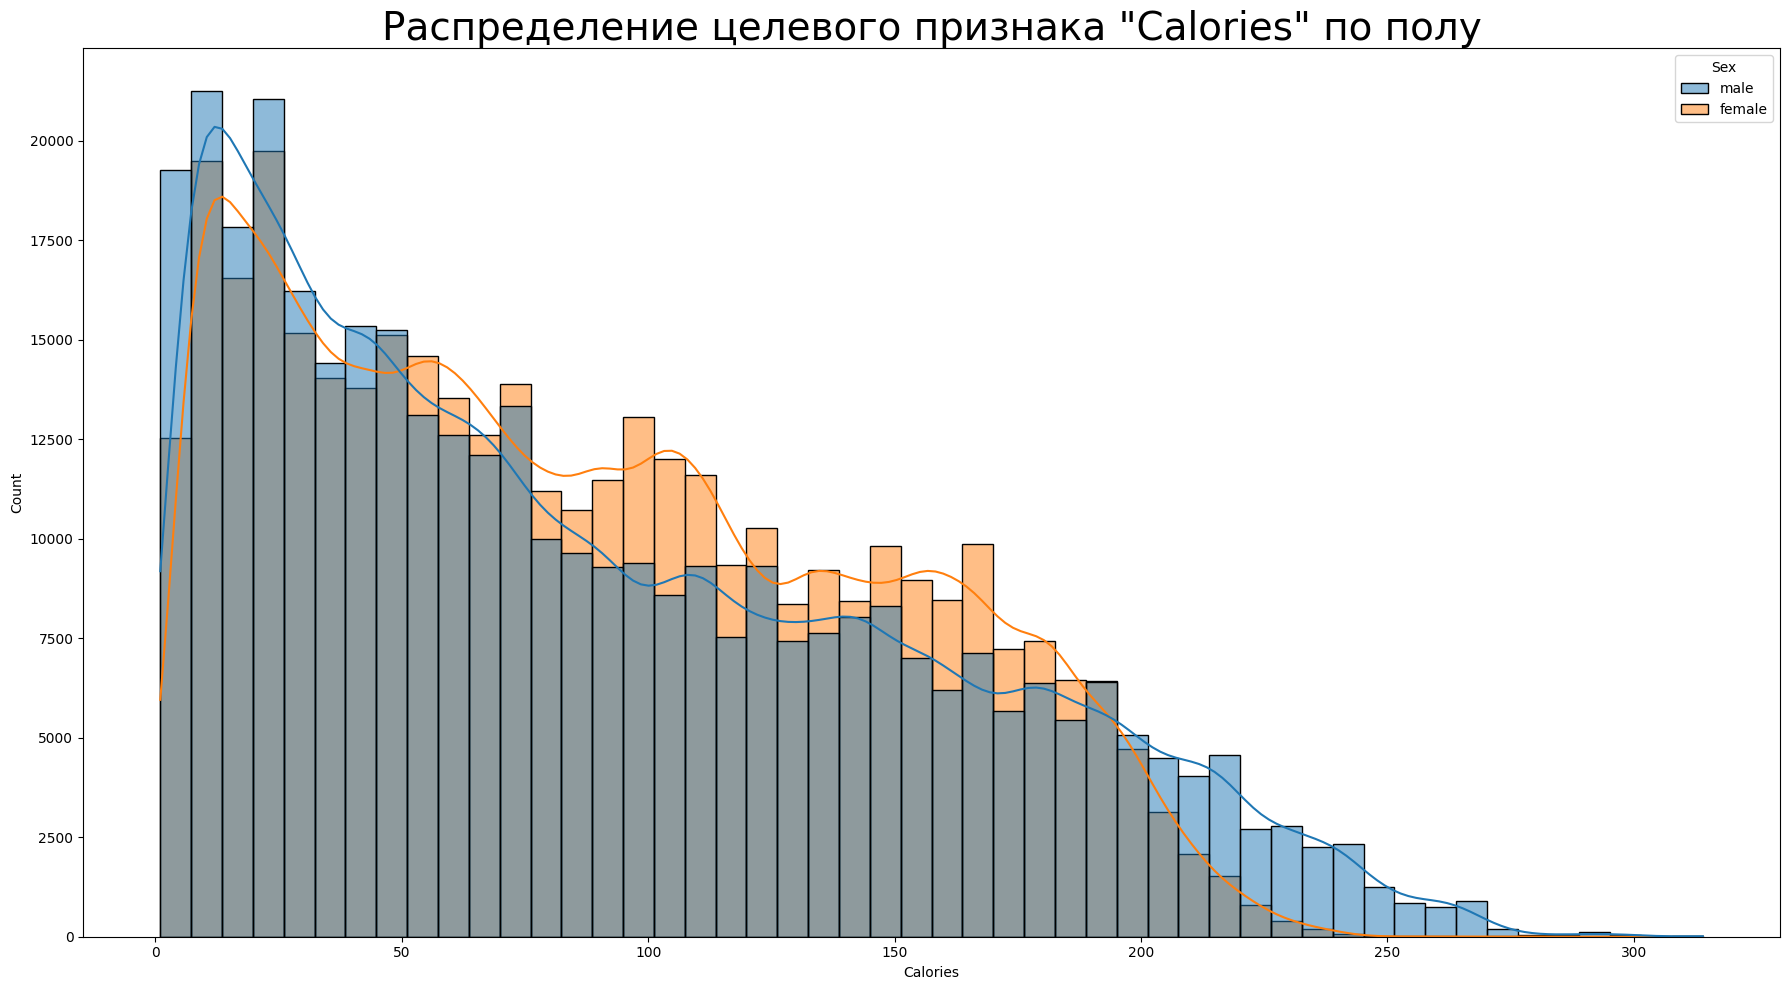

In [18]:
plt.figure(figsize=(18, 10))

sns.histplot(data=df, x=target, hue='Sex', bins=50, kde=True, alpha=0.5)
plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ "{target}" –ø–æ –ø–æ–ª—É', fontsize=28)
plt.grid(False)

plt.tight_layout()
plt.show()

---

## üîç –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ **Calories** (—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è):

* **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —è–≤–Ω–æ —Å–∫–æ—à–µ–Ω–æ –≤–ª–µ–≤–æ** (–∞—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ, —Å –¥–ª–∏–Ω–Ω—ã–º "—Ö–≤–æ—Å—Ç–æ–º" –≤–ø—Ä–∞–≤–æ).
* –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –ª–µ–∂–∏—Ç –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö **0‚Äì150**, –ø–∏–∫ –æ–∫–æ–ª–æ **20‚Äì40 –∫–∫–∞–ª**.
* –ï—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≤–ø–ª–æ—Ç—å –¥–æ **300+ –∫–∫–∞–ª**, –Ω–æ –æ–Ω–∏ **—Ä–µ–¥–∫–∏–µ** ‚Äî —ç—Ç–æ **–¥–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç**, –≤–æ–∑–º–æ–∂–Ω–æ, –≤—ã–±—Ä–æ—Å—ã.
* –ú—É–∂—á–∏–Ω—ã –≤ —Å—Ä–µ–¥–Ω–µ–º —Å–∂–∏–≥–∞—é—Ç **–±–æ–ª—å—à–µ –∫–∞–ª–æ—Ä–∏–π**, —á–µ–º –∂–µ–Ω—â–∏–Ω—ã:

  * –£ –º—É–∂—á–∏–Ω —Ö–≤–æ—Å—Ç –ø—Ä–∞–≤–µ–µ, –±–æ–ª—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –∫–∞–ª–æ—Ä–∏—è–º–∏ >200.
  * –£ –∂–µ–Ω—â–∏–Ω –º–∞–∫—Å–∏–º—É–º –±–ª–∏–∂–µ –∫ 80‚Äì120.

---

## üìå –í—ã–≤–æ–¥—ã:

1. **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ**, –≤—ã—Å–æ–∫–∞—è —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å:

   * –≠—Ç–æ –º–æ–∂–µ—Ç –∑–∞—Ç—Ä—É–¥–Ω–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏—é –µ—Å–ª–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤–∑—è—Ç—å MSE).
   * –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è **–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ**: `log1p(Calories)` ‚Äî —É—Å—Ç—Ä–∞–Ω–∏—Ç –ø–µ—Ä–µ–∫–æ—Å.

2. **–í—ã–±—Ä–æ—Å—ã**:

   * –ó–Ω–∞—á–µ–Ω–∏—è –≤—ã—à–µ **250‚Äì300 –∫–∫–∞–ª** ‚Äî **–∫—Ä–∞–π–Ω–∏–µ –∏ —Ä–µ–¥–∫–∏–µ**, —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å:

     * –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã –ª–∏ –æ–Ω–∏?
     * –Ω–µ —Å—Ç–æ–∏—Ç –ª–∏ –æ–±—Ä–µ–∑–∞—Ç—å/–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å?

3. **–†–∞–∑–ª–∏—á–∏–µ –ø–æ –ø–æ–ª—É**:

   * –ü–æ–ª –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ‚Äî –º–æ–∂–Ω–æ:

     * –æ–±—É—á–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω.

---

## ‚úÖ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

* –î–æ–±–∞–≤–∏—Ç—å –ª–æ–≥-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—É—é —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é: `Calories_log = np.log1p(Calories)`.
* –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ `Calories_log`, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—Ç–∞–ª–æ –ª–∏ –æ–Ω–æ –±–ª–∏–∂–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.
* –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã: –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å boxplot –∏–ª–∏ –æ–±—Ä–µ–∑–∞—Ç—å `Calories > 300`.

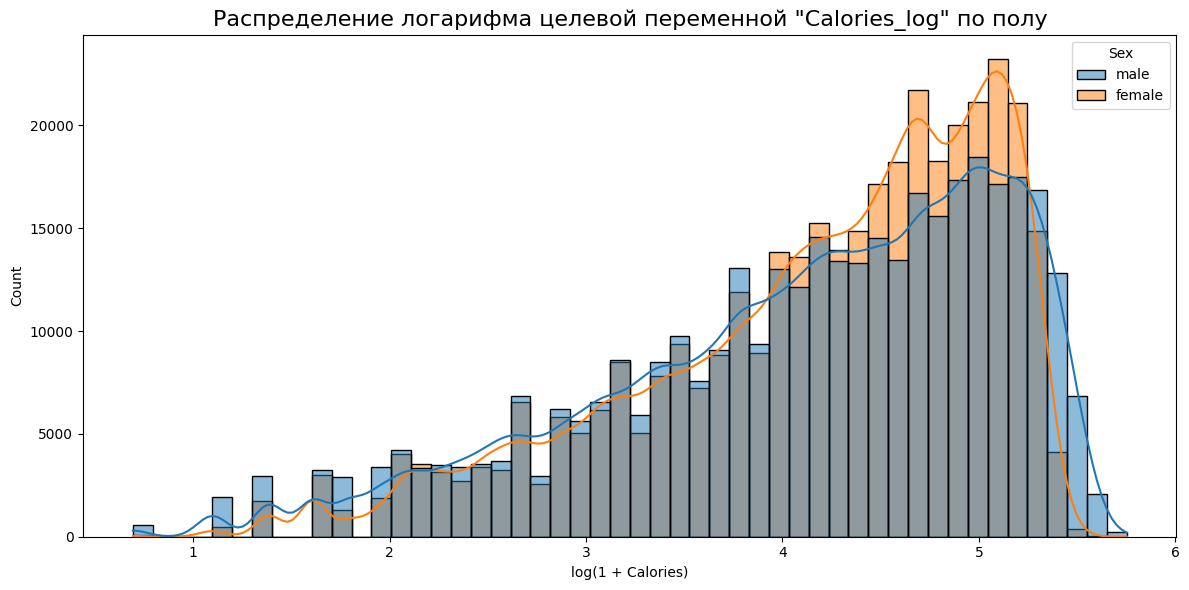

In [19]:
df['Calories_log'] = np.log1p(df['Calories'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Calories_log', hue='Sex', bins=50, kde=True, alpha=0.5)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π "Calories_log" –ø–æ –ø–æ–ª—É', fontsize=16)
plt.xlabel('log(1 + Calories)')
plt.grid(False)
plt.tight_layout()
plt.show()

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ log1p(Calories) –±—ã–ª–æ —É—Å–ø–µ—à–Ω—ã–º: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞–ª–æ –±–æ–ª–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –ø–æ–ª—É —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏—Å—å, –∏ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞–ª–∏ –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç—å –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ù—É–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `Calories_log = np.log1p(Calories)`



## –ü–æ–∏—Å–∫ –∏ –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤

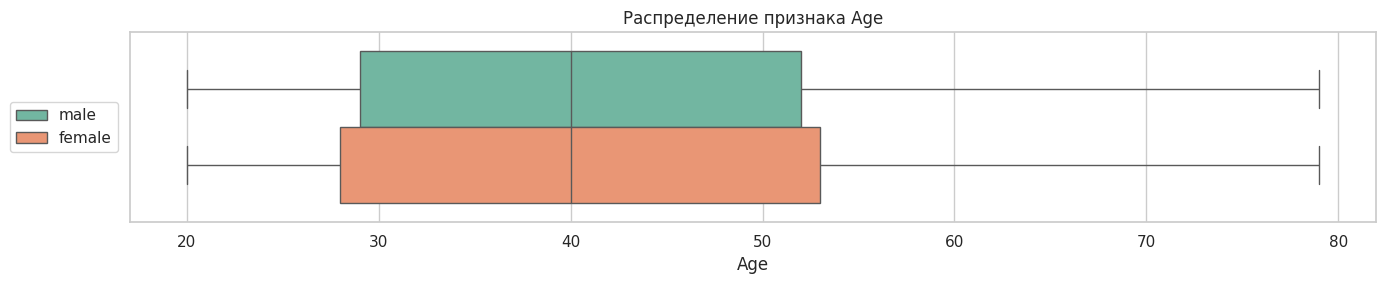

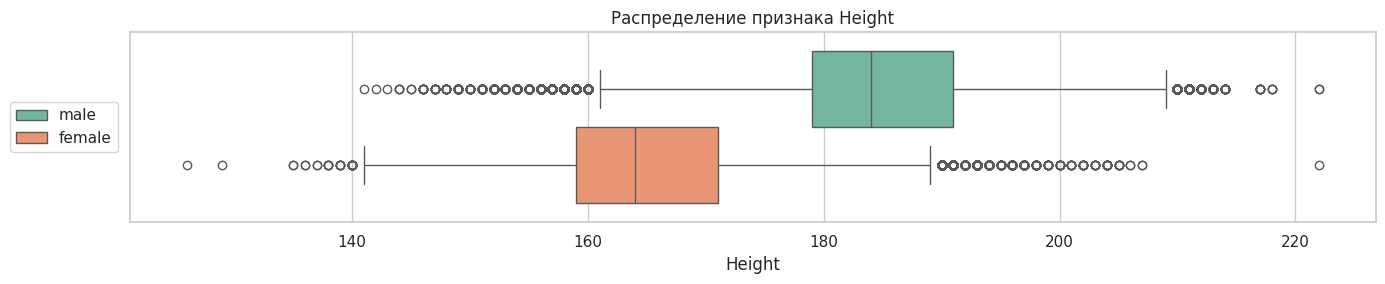

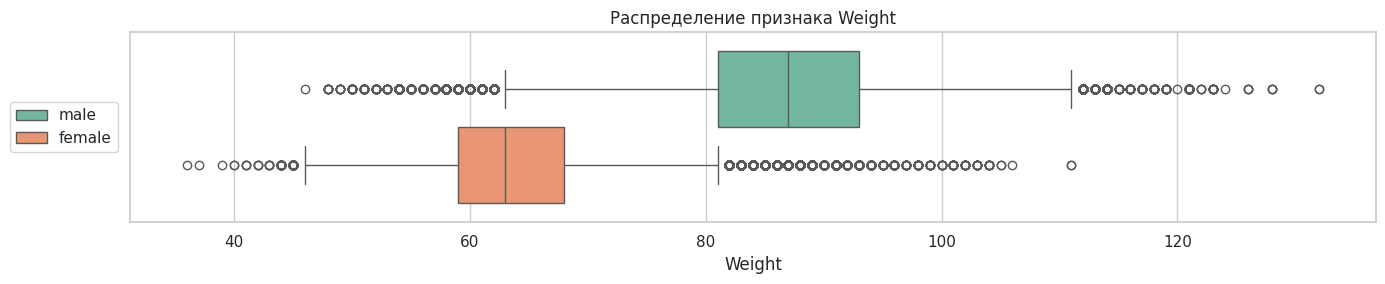

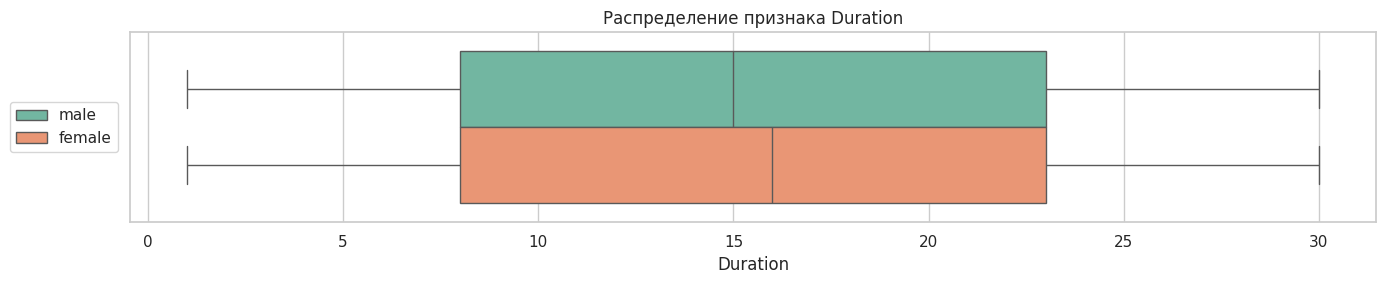

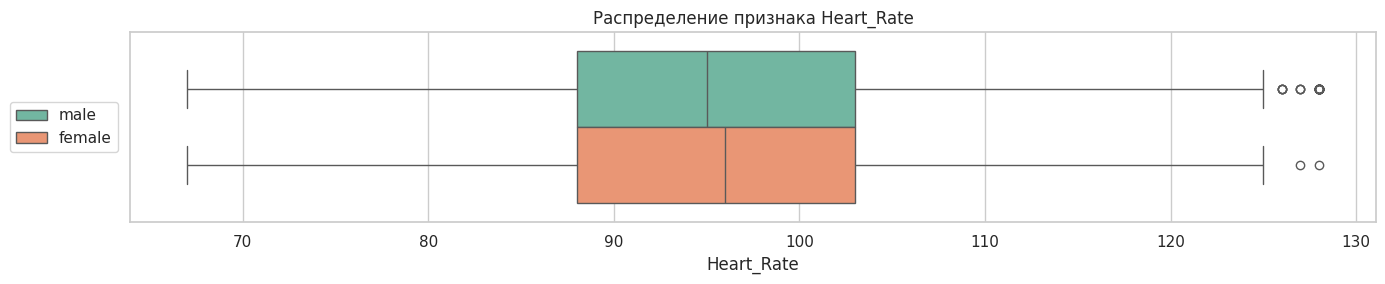

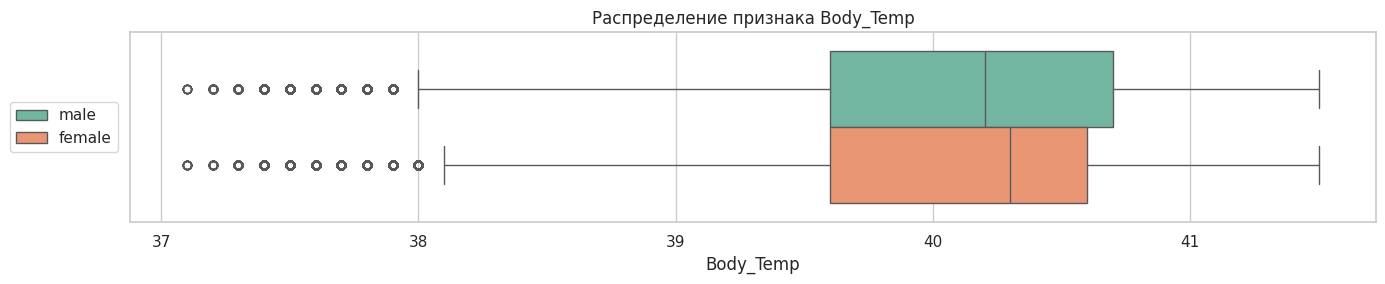

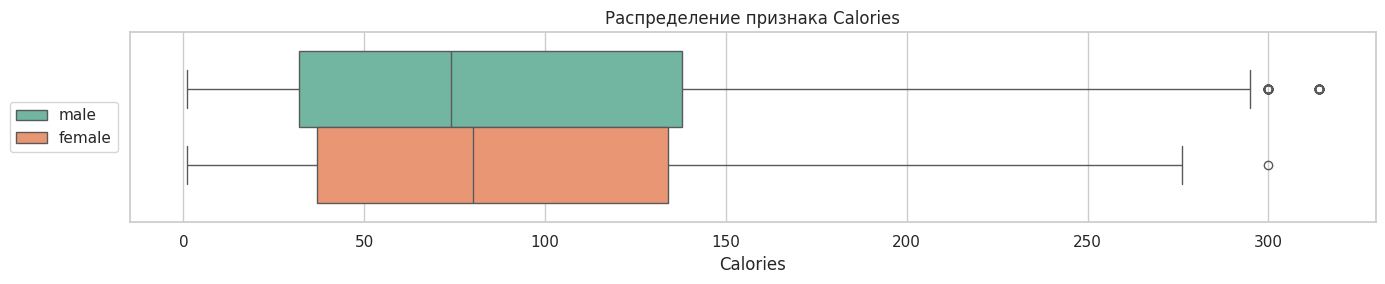

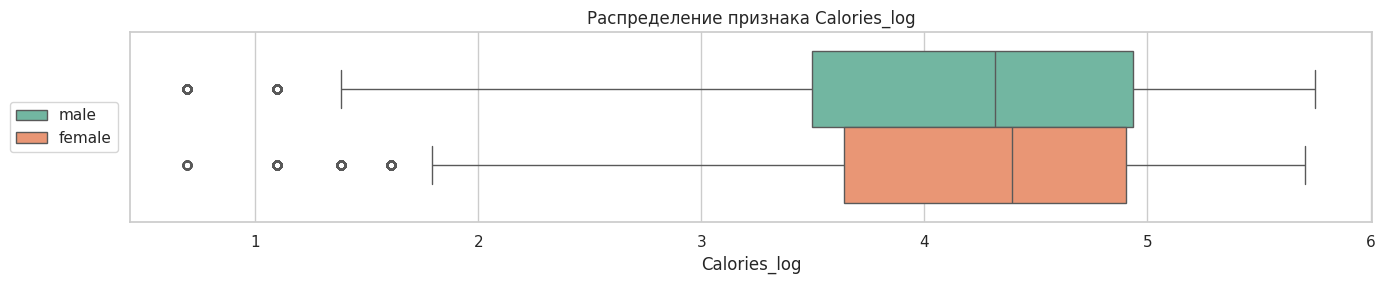

In [20]:
sns.set(style='whitegrid')

for col in num_cols + ['Calories_log']:
    plt.figure(figsize=(14, 3))
    sns.boxplot(data=df, x=col, hue='Sex', palette='Set2', legend=True)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ {col}')
    # –ü–µ—Ä–µ–º–µ—â–∞–µ–º –ª–µ–≥–µ–Ω–¥—É –≤ –ª–µ–≤—É—é —á–∞—Å—Ç—å –∏ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º –ø–æ –≤—ã—Å–æ—Ç–µ
    plt.legend(bbox_to_anchor=(-0.01, 0.5), loc='center right', borderaxespad=0)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö Height –∏ Weight. –ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –Ω–∏—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

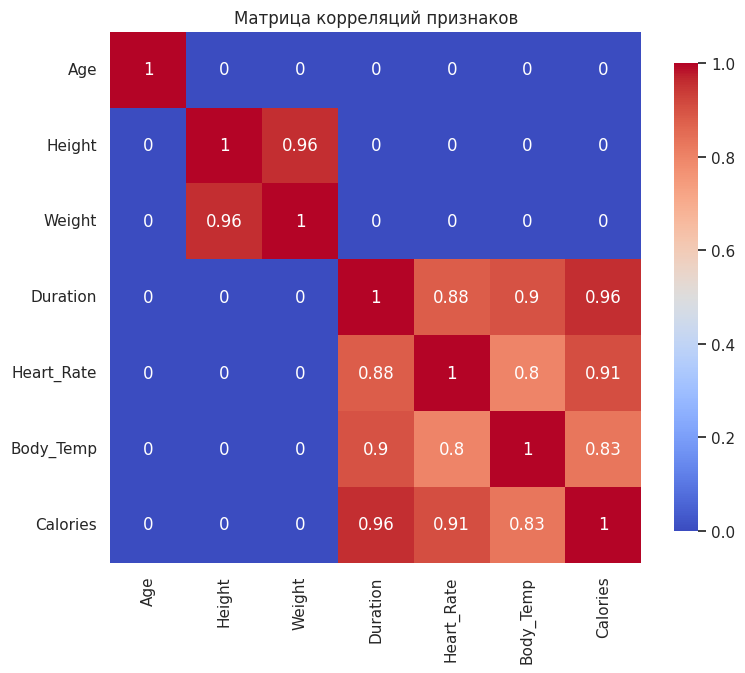

In [21]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –±–µ–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
corr_matrix = np.round(df[num_cols].corr(),2)
# –ó—É–Ω—É–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ –±–æ–ª—å—à–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.tight_layout()
plt.show()

–£ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ—Å—Ç—å —Å–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Å–æ–±–æ–π.

In [22]:
# –û–±–Ω—É–ª–∏–º –¥–∏–∞–≥–æ–Ω–∞–ª—å, —á—Ç–æ–±—ã –∏—Å–∫–ª—é—á–∏—Ç—å —Å–∞–º–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
corr_matrix_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, 0)

# –ü–æ–ª—É—á–∏–º –ø–∞—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π > 0.9 –∏–ª–∏ < -0.9
high_corr_pairs = (
    corr_matrix_no_diag
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –≤—ã—Å–æ–∫–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
high_corr_pairs = high_corr_pairs[
    high_corr_pairs['Correlation'].abs() > 0.7
].sort_values(by='Feature 1')

# –£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã (A-B –∏ B-A)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature 1'] < high_corr_pairs['Feature 2']]

high_corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

Feature 1   Feature 2  Correlation
0   Calories    Duration         0.96
1     Height      Weight         0.96
2   Calories  Heart_Rate         0.91
3  Body_Temp    Duration         0.90
4   Duration  Heart_Rate         0.88
5  Body_Temp    Calories         0.83
6  Body_Temp  Heart_Rate         0.80

–¢—Ä–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–º–µ—é—Ç —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - —ç—Ç–æ —Ö–æ—Ä–æ—à–æ –¥–ª—è –º–æ–¥–µ–ª–∏. –ù–æ —Ç–∞–∫–∂–µ –ø–æ–ª–æ–≤–∏–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–º–µ–µ—Ç —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É —Å–æ–±–æ–π, –Ω–æ —Ç.–∫. –º—ã –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å "–¥–µ—Ä–µ–≤—è–Ω–Ω—É—é" –º–æ–¥–µ–ª—å –Ω–µ —Å—Ç–æ–∏—Ç –æ–± —ç—Ç–æ–º –±–µ—Å–ø–æ–∫–æ–∏—Ç—å—Å—è.

–î–§ —Å–æ–¥–µ—Ä–∂–∏—Ç 750—Ç—ã—Å —Å—Ç—Ä–æ–∫ –∏ –∑–∞–Ω–∏–º–∞–µ—Ç –≤ –ø–∞–º—è—Ç–∏ 88–ú–ë, —Ç.–µ. –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∏–ª–∏—á–Ω—ã–π –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ –∑–∞–¥—É–º–∞—Ç—å—Å—è –Ω–∞–¥ –æ–ø—Ç–∏–º–∏–∑–∏—Ü–∏–µ–π —Ç–∏–ø–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö. –î–ª—è —ç—Ç–æ–≥–æ –µ—Å—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è.

In [23]:
df = memory_compression(df)

–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ —Ä–∞–≤–µ–Ω 95.48 –º–±.
–ö–æ–Ω–µ—á–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ —Ä–∞–≤–µ–Ω 17.1 –º–±.
–≠–∫–æ–Ω–æ–º–∏—è –ø–∞–º—è—Ç–∏ = 82.1%


# <font color='#11a642' size='6'> **–†–∞–∑–¥–µ–ª–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç**

In [24]:
# –ù–µ –±—É–¥–µ–º –ø–æ–∫–∞ –≤—ã–¥–µ–ª—è—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, —Ç.–∫. –¥–∞–ª–µ–µ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
train, valid = train_test_split(df, test_size=0.2, stratify=df['Sex'], random_state=SEED)

# <font color='#11a642' size='6'> **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π**

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ **Random Forest**. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–±–µ—Ä–∏—Ç–µ –ª–∏–±–æ –≤—Ä—É—á–Ω—É—é, –ª–∏–±–æ —Å –ø–æ–º–æ—â—å—é GridSearchCV –∏–ª–∏ RandomizedSearchCV


- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞—Ä–∞–Ω–µ–µ?
- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏?

In [25]:
# –í—ã—à–µ –±—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç - –µ—Å–ª–∏ –±—ã –±—ã–ª–∏ - –∏—Ö –Ω—É–∂–Ω–æ –±—ã–ª–æ –±—ã —á–µ–º-—Ç–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å

print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:", df.isnull().sum().sum())

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: 0


#### RandomForestRegressor —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é

In [26]:
# –î–ª—è Random Forest –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ 0/1

map_dict = {'male': 1, 'female': 0}
train["sex"] = train["Sex"].map(map_dict).astype(np.int8)
valid["sex"] = valid["Sex"].map(map_dict).astype(np.int8)

model_columns = numeric_cols + ["sex"]

params = {'n_jobs': -1}

rf1, metrics_df, _ = train_valid_model(RandomForestRegressor, 1, params,
                                       train, valid, model_columns, target)

metrics_df

Metric   Train1    Valid1  Diff1,%
0    mse  2.09836  14.48578   590.34
1   rmse  1.44857   3.80602   162.74
2    mae  0.86619   2.31118   166.82
3   mape  0.01492   0.03995   167.75
4     r2  0.99946   0.99627    -0.32
5  rmsle  0.02526   0.06404   153.51

Depth:  6 | Train RMSE:   9.39 | Valid RMSE:   9.37
Depth:  8 | Train RMSE:   6.64 | Valid RMSE:   6.67
Depth: 10 | Train RMSE:   4.83 | Valid RMSE:   4.98
Depth: 12 | Train RMSE:   3.77 | Valid RMSE:   4.12
Depth: 14 | Train RMSE:   3.07 | Valid RMSE:   3.78
Depth: 16 | Train RMSE:   2.50 | Valid RMSE:   3.73
Depth: 18 | Train RMSE:   2.01 | Valid RMSE:   3.75
Depth: 20 | Train RMSE:   1.68 | Valid RMSE:   3.78

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞: –ª—É—á—à–∏–π Valid RMSE (3.73) –±—ã–ª –Ω–∞ –≥–ª—É–±–∏–Ω–µ 16


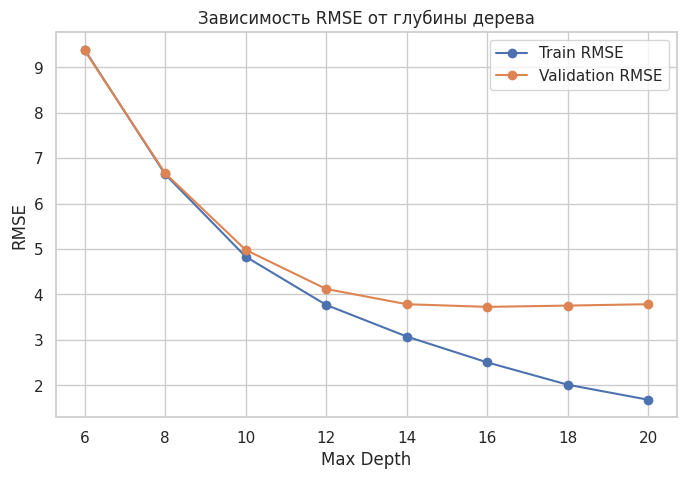

In [27]:
# –ü–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞

opt_depth_rf = find_depth(RandomForestRegressor, params, depths=range(6, 23, 2))

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ

- –î–ª—è –∑–∞–ø—É—Å–∫–∞ GridSearchCV - –ø—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ —Å–ª–µ–¥—É—é—â—É—é —è—á–µ–π–∫—É –≤ —Ñ–æ—Ä–º–∞—Ç "Code"
- –ò–ª–∏ –∑–∞–ø—É—Å—Ç–∏—Ç–µ —Å–∫—Ä–∏–ø—Ç: https://github.com/saspav/python_for_pro/blob/main/HW_ML_4_RandomForest.py

#### –†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã  GridSearchCV:

#### RandomForestRegressor —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [28]:
rf_best_grid = {'max_depth': 17, 'max_features': 0.5, 'min_samples_leaf': 1,
                'min_samples_split': 8, 'n_estimators': 500, 'n_jobs': -1}

rf2, metrics_df2, _ = train_valid_model(RandomForestRegressor, 2, rf_best_grid,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df2.drop(columns=['Metric'])], axis=1)
metrics_df

Metric   Train1    Valid1  Diff1,%   Train2    Valid2  Diff2,%
0    mse  2.09836  14.48578   590.34  7.41373  13.25001    78.72
1   rmse  1.44857   3.80602   162.74  2.72282   3.64006    33.69
2    mae  0.86619   2.31118   166.82  1.72243   2.17881    26.50
3   mape  0.01492   0.03995   167.75  0.03091   0.03811    23.30
4     r2  0.99946   0.99627    -0.32  0.99810   0.99659    -0.15
5  rmsle  0.02526   0.06404   153.51  0.04921   0.06160    25.17

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –±—É—Å—Ç–∏–Ω–≥–∞ **XGBoost**. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–±–µ—Ä–∏—Ç–µ –ª–∏–±–æ –≤—Ä—É—á–Ω—É—é, –ª–∏–±–æ —Å –ø–æ–º–æ—â—å—é GridSearchCV –∏–ª–∏ RandomizedSearchCV


- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞—Ä–∞–Ω–µ–µ?
- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏?

#### XGBRegressor —Å —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é

In [29]:
# –î–ª—è XGBRegressor –Ω–µ –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏,
# –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –Ω—É–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å: enable_categorical=True

# XGBRegressor —Å–∞–º –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –¥–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
# (–≤–µ—Ç–≤–ª–µ–Ω–∏–µ "–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é"). –ï—Å–ª–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ –µ—Å—Ç—å NaN, –º–æ–¥–µ–ª—å –Ω–∞—É—á–∏—Ç—Å—è –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å —Ç–∞–∫–∏–µ —Å–ª—É—á–∞–∏
# –≤ –ª–µ–≤—É—é –∏–ª–∏ –ø—Ä–∞–≤—É—é –≤–µ—Ç–≤—å –¥–µ—Ä–µ–≤–∞, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫—É.

model_columns = numeric_cols + cat_cols

params = {'enable_categorical': True, 'n_jobs': -1}

xb1, metrics_df3, _ = train_valid_model(XGBRegressor, 3, params,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df3.drop(columns=['Metric'])], axis=1)
metrics_df3

Metric    Train3    Valid3  Diff3,%
0    mse  12.72249  14.52909    14.20
1   rmse   3.56686   3.81170     6.86
2    mae   2.32070   2.37934     2.53
3   mape   0.04097   0.04203     2.59
4     r2   0.99673   0.99626    -0.05
5  rmsle   0.06296   0.06608     4.96

Depth:  6 | Train RMSE:   3.57 | Valid RMSE:   3.81
Depth:  8 | Train RMSE:   3.25 | Valid RMSE:   3.71
Depth: 10 | Train RMSE:   2.90 | Valid RMSE:   3.71
Depth: 12 | Train RMSE:   2.41 | Valid RMSE:   3.77

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞: –ª—É—á—à–∏–π Valid RMSE (3.71) –±—ã–ª –Ω–∞ –≥–ª—É–±–∏–Ω–µ 8


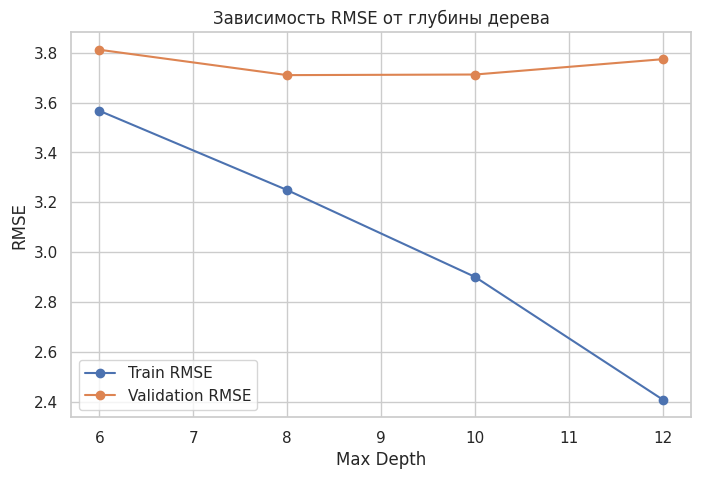

In [30]:
# –ü–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞

opt_depth_xb = find_depth(XGBRegressor, params, depths=range(6, 23, 2))

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ

- –ó–∞–ø—É—Å—Ç–∏—Ç–µ —Å–∫—Ä–∏–ø—Ç: https://github.com/saspav/python_for_pro/blob/main/HW_ML_4_xgboost.py

#### XGBRegressor —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [31]:
xb_best_grid = {'eta': 0.028886882560958116, 'max_depth': 7, 'subsample': 0.8,
                'colsample_bytree': 0.9, 'gamma': 0.2110692155097766,
                'enable_categorical': True, 'n_jobs': -1}

xb2, metrics_df4, _ = train_valid_model(XGBRegressor, 4, xb_best_grid,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df4.drop(columns=['Metric'])], axis=1)
metrics_df4

Metric    Train4    Valid4  Diff4,%
0    mse  30.36692  30.60842     0.80
1   rmse   5.51062   5.53249     0.40
2    mae   4.08107   4.08261     0.04
3   mape   0.13646   0.13634    -0.08
4     r2   0.99221   0.99212    -0.01
5  rmsle   0.18479   0.18465    -0.07

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –±—É—Å—Ç–∏–Ω–≥–∞ **LightGBM**. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–±–µ—Ä–∏—Ç–µ –ª–∏–±–æ –≤—Ä—É—á–Ω—É—é, –ª–∏–±–æ —Å –ø–æ–º–æ—â—å—é GridSearchCV –∏–ª–∏ RandomizedSearchCV


- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞—Ä–∞–Ω–µ–µ?
- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏?

#### LGBMRegressor —Å —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é

In [32]:
# –î–ª—è LGBMRegressor –Ω–µ –Ω—É–∂–Ω–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

# LightGBM –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø—Ä–æ–ø—É—Å–∫–∏, –Ω–æ –±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –∑–∞ —Å—á–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º.

params = {'n_jobs': -1, 'verbosity': -1}

lg1, metrics_df5, _ = train_valid_model(LGBMRegressor, 5, params,
                                        train, valid, model_columns, target)
metrics_df = pd.concat([metrics_df, metrics_df5.drop(columns=['Metric'])], axis=1)
metrics_df5

Metric    Train5    Valid5  Diff5,%
0    mse  14.20000  14.63242     3.05
1   rmse   3.76829   3.82523     1.51
2    mae   2.36443   2.38157     0.72
3   mape   0.04368   0.04401     0.75
4     r2   0.99636   0.99623    -0.01
5  rmsle   0.06979   0.07047     0.98

Depth:  6 | Train RMSE:   3.81 | Valid RMSE:   3.87
Depth:  8 | Train RMSE:   3.78 | Valid RMSE:   3.84
Depth: 10 | Train RMSE:   3.78 | Valid RMSE:   3.83
Depth: 12 | Train RMSE:   3.77 | Valid RMSE:   3.83
Depth: 14 | Train RMSE:   3.77 | Valid RMSE:   3.83
Depth: 16 | Train RMSE:   3.77 | Valid RMSE:   3.83
Depth: 18 | Train RMSE:   3.77 | Valid RMSE:   3.83
Depth: 20 | Train RMSE:   3.77 | Valid RMSE:   3.83
Depth: 22 | Train RMSE:   3.77 | Valid RMSE:   3.83


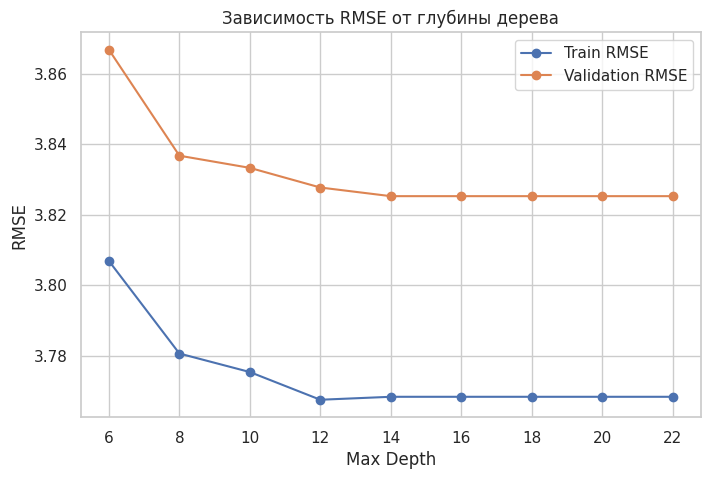

In [33]:
# –ü–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞

opt_depth_lg = find_depth(LGBMRegressor, params, depths=range(6, 23, 2))

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ

- –ó–∞–ø—É—Å—Ç–∏—Ç–µ —Å–∫—Ä–∏–ø—Ç: https://github.com/saspav/python_for_pro/blob/main/HW_ML_4_lightgbm.py

#### LGBMRegressor —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [34]:
lg_best_grid = {'boosting_type': 'gbdt', 'learning_rate': 0.2, 'num_leaves': 140,
                'max_depth': 13, 'subsample': 0.7, 'colsample_bytree': 1.0,
                'reg_alpha': 0.393, 'reg_lambda': 0.33888189, 'min_child_samples': 41,
                'bagging_fraction': 0.715, 'bagging_freq': 6, 'n_jobs': -1, 'verbosity': -1}

lg2, metrics_df6, _ = train_valid_model(LGBMRegressor, 6, lg_best_grid,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df6.drop(columns=['Metric'])], axis=1)
metrics_df6

Metric    Train6    Valid6  Diff6,%
0    mse  12.17063  13.58028    11.58
1   rmse   3.48864   3.68514     5.63
2    mae   2.18698   2.25878     3.28
3   mape   0.03914   0.04007     2.37
4     r2   0.99688   0.99650    -0.04
5  rmsle   0.06210   0.06387     2.84

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –±—É—Å—Ç–∏–Ω–≥–∞ **Catboost**. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥–±–µ—Ä–∏—Ç–µ –ª–∏–±–æ –≤—Ä—É—á–Ω—É—é, –ª–∏–±–æ —Å –ø–æ–º–æ—â—å—é GridSearchCV –∏–ª–∏ RandomizedSearchCV


- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∑–∞—Ä–∞–Ω–µ–µ?
- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏?

#### CatBoostRegressor —Å —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é

In [35]:
params = {'cat_features': cat_cols, 'verbose': False}

cb1, metrics_df7, _ = train_valid_model(CatBoostRegressor, 7, params,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df7.drop(columns=['Metric'])], axis=1)
metrics_df7

Metric    Train7    Valid7  Diff7,%
0    mse  11.16620  12.65105    13.30
1   rmse   3.34159   3.55683     6.44
2    mae   2.09411   2.12467     1.46
3   mape   0.03752   0.03818     1.77
4     r2   0.99713   0.99674    -0.04
5  rmsle   0.05958   0.06202     4.10

Depth:  6 | Train RMSE:   3.34 | Valid RMSE:   3.56
Depth:  8 | Train RMSE:   3.25 | Valid RMSE:   3.56
Depth: 10 | Train RMSE:   3.13 | Valid RMSE:   3.54
Depth: 12 | Train RMSE:   3.00 | Valid RMSE:   3.55
Depth: 14 | Train RMSE:   2.84 | Valid RMSE:   3.57

–†–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞: –ª—É—á—à–∏–π Valid RMSE (3.54) –±—ã–ª –Ω–∞ –≥–ª—É–±–∏–Ω–µ 10


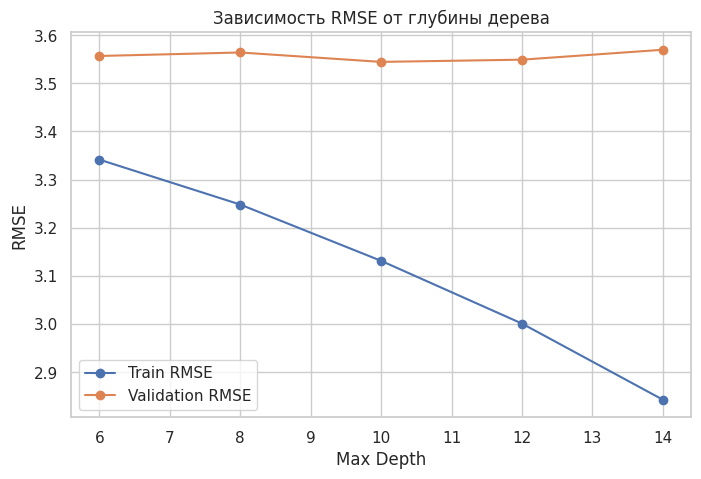

In [36]:
# –ü–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞

opt_depth_cb = find_depth(CatBoostRegressor, params, depths=range(6, 23, 2))

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ —Å–µ—Ç–∫–µ

- –ó–∞–ø—É—Å—Ç–∏—Ç–µ —Å–∫—Ä–∏–ø—Ç: https://github.com/saspav/python_for_pro/blob/main/HW_ML_4_catboost.py

#### CatBoostRegressor —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [37]:
cb_best_grid = {'learning_rate': 0.1559073096894334, 'depth': 11,
                'l2_leaf_reg': 9.204228730749122, 'min_data_in_leaf': 95,
                'colsample_bylevel': 0.9, 'grow_policy': 'SymmetricTree',
                'bootstrap_type': 'Bernoulli', 'subsample': 1.0,
                'cat_features': cat_cols, 'verbose': False}

cb2, metrics_df8, _ = train_valid_model(CatBoostRegressor, 8, cb_best_grid,
                                        train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics_df8.drop(columns=['Metric'])], axis=1)
metrics_df8

Metric   Train8    Valid8  Diff8,%
0    mse  9.58477  12.61989    31.67
1   rmse  3.09593   3.55245    14.75
2    mae  1.99618   2.11457     5.93
3   mape  0.03608   0.03761     4.23
4     r2  0.99754   0.99675    -0.08
5  rmsle  0.05691   0.06103     7.25

In [38]:
metrics_df

Metric   Train1    Valid1  Diff1,%   Train2    Valid2  Diff2,%    Train3  \
0    mse  2.09836  14.48578   590.34  7.41373  13.25001    78.72  12.72249   
1   rmse  1.44857   3.80602   162.74  2.72282   3.64006    33.69   3.56686   
2    mae  0.86619   2.31118   166.82  1.72243   2.17881    26.50   2.32070   
3   mape  0.01492   0.03995   167.75  0.03091   0.03811    23.30   0.04097   
4     r2  0.99946   0.99627    -0.32  0.99810   0.99659    -0.15   0.99673   
5  rmsle  0.02526   0.06404   153.51  0.04921   0.06160    25.17   0.06296   

     Valid3  Diff3,%    Train4    Valid4  Diff4,%    Train5    Valid5  \
0  14.52909    14.20  30.36692  30.60842     0.80  14.20000  14.63242   
1   3.81170     6.86   5.51062   5.53249     0.40   3.76829   3.82523   
2   2.37934     2.53   4.08107   4.08261     0.04   2.36443   2.38157   
3   0.04203     2.59   0.13646   0.13634    -0.08   0.04368   0.04401   
4   0.99626    -0.05   0.99221   0.99212    -0.01   0.99636   0.99623   
5   0.06608     4.96   0.18479   0.18465    -0.07   0.06979   0.07047   

   Diff5,%    Train6    Valid6  Diff6,%    Train7    Valid7  Diff7,%   Train8  \
0     3.05  12.17063  13.58028    11.58  11.16620  12.65105    13.30  9.58477   
1     1.51   3.48864   3.68514     5.63   3.34159   3.55683     6.44  3.09593   
2     0.72   2.18698   2.25878     3.28   2.09411   2.12467     1.46  1.99618   
3     0.75   0.03914   0.04007     2.37   0.03752   0.03818     1.77  0.03608   
4    -0.01   0.99688   0.99650    -0.04   0.99713   0.99674    -0.04  0.99754   
5     0.98   0.06210   0.06387     2.84   0.05958   0.06202     4.10  0.05691   

     Valid8  Diff8,%  
0  12.61989    31.67  
1   3.55245    14.75  
2   2.11457     5.93  
3   0.03761     4.23  
4   0.99675    -0.08  
5   0.06103     7.25

In [39]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º

find_best_model(metrics_df)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (12.6199)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (3.5524)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (2.1146)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.0376)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.9968)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.0610)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 –Ω–∞ 6 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


### –ü–æ–ø—Ä–æ–±—É–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –æ–±—É—á–∏—Ç—å –Ω–∞ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [40]:
cb3, metrics_df9, _ = train_valid_model(CatBoostRegressor, 9, cb_best_grid,
                                        train, valid, model_columns, target, target_log=True)

metrics_df = pd.concat([metrics_df, metrics_df9.drop(columns=['Metric'])], axis=1)
metrics_df9

Metric    Train9    Valid9  Diff9,%
0    mse  10.82605  12.79432    18.18
1   rmse   3.29030   3.57691     8.71
2    mae   2.04657   2.11105     3.15
3   mape   0.03412   0.03687     8.08
4     r2   0.99722   0.99671    -0.05
5  rmsle   0.05192   0.06027    16.09

In [41]:
metrics_df

Metric   Train1    Valid1  Diff1,%   Train2    Valid2  Diff2,%    Train3  \
0    mse  2.09836  14.48578   590.34  7.41373  13.25001    78.72  12.72249   
1   rmse  1.44857   3.80602   162.74  2.72282   3.64006    33.69   3.56686   
2    mae  0.86619   2.31118   166.82  1.72243   2.17881    26.50   2.32070   
3   mape  0.01492   0.03995   167.75  0.03091   0.03811    23.30   0.04097   
4     r2  0.99946   0.99627    -0.32  0.99810   0.99659    -0.15   0.99673   
5  rmsle  0.02526   0.06404   153.51  0.04921   0.06160    25.17   0.06296   

     Valid3  Diff3,%    Train4    Valid4  Diff4,%    Train5    Valid5  \
0  14.52909    14.20  30.36692  30.60842     0.80  14.20000  14.63242   
1   3.81170     6.86   5.51062   5.53249     0.40   3.76829   3.82523   
2   2.37934     2.53   4.08107   4.08261     0.04   2.36443   2.38157   
3   0.04203     2.59   0.13646   0.13634    -0.08   0.04368   0.04401   
4   0.99626    -0.05   0.99221   0.99212    -0.01   0.99636   0.99623   
5   0.06608     4.96   0.18479   0.18465    -0.07   0.06979   0.07047   

   Diff5,%    Train6    Valid6  Diff6,%    Train7    Valid7  Diff7,%   Train8  \
0     3.05  12.17063  13.58028    11.58  11.16620  12.65105    13.30  9.58477   
1     1.51   3.48864   3.68514     5.63   3.34159   3.55683     6.44  3.09593   
2     0.72   2.18698   2.25878     3.28   2.09411   2.12467     1.46  1.99618   
3     0.75   0.03914   0.04007     2.37   0.03752   0.03818     1.77  0.03608   
4    -0.01   0.99688   0.99650    -0.04   0.99713   0.99674    -0.04  0.99754   
5     0.98   0.06210   0.06387     2.84   0.05958   0.06202     4.10  0.05691   

     Valid8  Diff8,%    Train9    Valid9  Diff9,%  
0  12.61989    31.67  10.82605  12.79432    18.18  
1   3.55245    14.75   3.29030   3.57691     8.71  
2   2.11457     5.93   2.04657   2.11105     3.15  
3   0.03761     4.23   0.03412   0.03687     8.08  
4   0.99675    -0.08   0.99722   0.99671    -0.05  
5   0.06103     7.25   0.05192   0.06027    16.09

In [42]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º

find_best_model(metrics_df)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (12.6199)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (3.5524)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid9 (2.1111)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid9 (0.0369)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.9968)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid9 (0.0603)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 –Ω–∞ 3 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


In [43]:
metrics_8_9 = pd.concat([metrics_df8, metrics_df9.drop(columns=['Metric'])], axis=1)
metrics_8_9.round(4)

Metric  Train8   Valid8  Diff8,%   Train9   Valid9  Diff9,%
0    mse  9.5848  12.6199    31.67  10.8260  12.7943    18.18
1   rmse  3.0959   3.5524    14.75   3.2903   3.5769     8.71
2    mae  1.9962   2.1146     5.93   2.0466   2.1111     3.15
3   mape  0.0361   0.0376     4.23   0.0341   0.0369     8.08
4     r2  0.9975   0.9968    -0.08   0.9972   0.9967    -0.05
5  rmsle  0.0569   0.0610     7.25   0.0519   0.0603    16.09

### –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤

In [44]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
outlier_cols = ['Height', 'Weight']

# –¢—É—Ç –±—É–¥–µ–º —Ö—Ä–∞–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç
results = []

for sex in (0, 1):
    # –í—ã–±–∏—Ä–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø–æ–ª–∞
    X_sex = train[train['sex'] == sex].copy()

    # –í—ã—á–∏—Å–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã —Ç–æ–ª—å–∫–æ –¥–ª—è —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
    outlier_flags = calculate_outliers(X_sex[outlier_cols], q_range=2)

    # –§–∏–ª—å—Ç—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã
    X_filtered = X_sex[~outlier_flags.any(axis=1)]
    results.append(X_filtered)

    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    print(f"–ü–æ–ª {sex}:")
    print(f"  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: {len(X_sex)}")
    print(f"  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: {len(X_filtered)}")
    print(f"  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {len(X_sex) - len(X_filtered)}")
    print(f"  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: {100 * outlier_flags.any(axis=1).mean():.2f}%\n")

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
train_out = pd.concat(results)

# –£—á–∏–º –º–æ–¥–µ–ª—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –æ—Ç GridSearchCV
cb10, metrics10, _ = train_valid_model(CatBoostRegressor, 10, cb_best_grid,
                                       train_out, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics10.drop(columns=['Metric'])], axis=1)
metrics10

–ü–æ–ª 0:
  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: 299432
  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: 298571
  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 861
  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: 0.29%

–ü–æ–ª 1:
  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: 298295
  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: 297833
  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 462
  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: 0.15%



Metric  Train10   Valid10  Diff10,%
0    mse  9.47761  12.64782     33.45
1   rmse  3.07857   3.55638     15.52
2    mae  1.98916   2.11733      6.44
3   mape  0.03603   0.03774      4.76
4     r2  0.99757   0.99674     -0.08
5  rmsle  0.05678   0.06147      8.27

In [45]:
# –°—Ä–∞–≤–Ω–∏–º 2 –º–æ–¥–µ–ª–∏ 8 –∏ 10

metrics_8_10 = pd.concat([metrics_df8, metrics10.drop(columns=['Metric'])], axis=1)
metrics_8_10.round(4)

Metric  Train8   Valid8  Diff8,%  Train10  Valid10  Diff10,%
0    mse  9.5848  12.6199    31.67   9.4776  12.6478     33.45
1   rmse  3.0959   3.5524    14.75   3.0786   3.5564     15.52
2    mae  1.9962   2.1146     5.93   1.9892   2.1173      6.44
3   mape  0.0361   0.0376     4.23   0.0360   0.0377      4.76
4     r2  0.9975   0.9968    -0.08   0.9976   0.9967     -0.08
5  rmsle  0.0569   0.0610     7.25   0.0568   0.0615      8.27

In [46]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º CatBoostRegressor: —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤

find_best_model(metrics_8_10)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (12.6199)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (3.5524)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (2.1146)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.0376)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.9968)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 (0.0610)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid8 –Ω–∞ 6 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


#### –í—ã–≤–æ–¥: —É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ —É—Ö—É–¥—à–∏–ª–æ –º–æ–¥–µ–ª—å

## <font color='#11a642' size='5'> –í—ã–≤–æ–¥—ã:

### <font color='#11a642' size='4'>
- –ö–∞–∫–∞—è –º–æ–¥–µ–ª—å –æ–∫–∞–∑–∞–ª–∞—Å—å –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ –ª—É—á—à–µ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º?
- –ö–∞–∫–∞—è –º–æ–¥–µ–ª—å —Ç—Ä–µ–±—É–µ—Ç –º–µ–Ω—å—à–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—Ä–∞–±–æ—Ç–æ–∫ –¥–∞–Ω–Ω—ã—Ö?
- –ö–∞–∫—É—é –º–æ–¥–µ–ª—å –≤—ã –≤—ã–±–∏—Ä–∞–µ—Ç–µ –∏ –ø–æ—á–µ–º—É?

## üß† –í —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö –ø—Ä–∏–Ω–∏–º–∞–ª–∏ —É—á–∞—Å—Ç–∏–µ:
- –ú–æ–¥–µ–ª—å 1: RandomForestRegressor —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
- –ú–æ–¥–µ–ª—å 2: RandomForestRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –ú–æ–¥–µ–ª—å 3: XGBRegressor —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
- –ú–æ–¥–µ–ª—å 4: XGBRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –ú–æ–¥–µ–ª—å 5: LGBMRegressor —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
- –ú–æ–¥–µ–ª—å 6: LGBMRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –ú–æ–¥–µ–ª—å 7: CatBoostRegressor —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
- –ú–æ–¥–µ–ª—å 8: CatBoostRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –ú–æ–¥–µ–ª—å 9: CatBoostRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
- –ú–æ–¥–µ–ª—å 10: CatBoostRegressor —Å –ø–æ–¥–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —Å —É–¥–∞–ª–µ–Ω–∏–µ–º –≤—ã–±—Ä–æ—Å–æ–≤ –∏–∑ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
---

### –ü—Ä–æ–≤–µ–¥—ë–º –∞–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º:


## üîç **1. –ö–∞–∫–∞—è –º–æ–¥–µ–ª—å –æ–∫–∞–∑–∞–ª–∞—Å—å –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –∏ –ª—É—á—à–µ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º?**

### üìä –û—Ü–µ–Ω–∫–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏:

–û—Ü–µ–Ω–∏–≤–∞–µ–º –ø–æ `Diff = (Valid - Train) / Train * 100%`.

### üîù –õ–∏–¥–µ—Ä—ã –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏:

#### üîπ **–ú–æ–¥–µ–ª—å 4 (XGB + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã)**:

* MSE Diff: **0.79%**
* RMSE Diff: **0.40%**
* MAE Diff: **0.06%**
* R¬≤ Diff: **‚Äì0.01%**
* RMSLE Diff: **‚Äì0.05%**

‚Üí **–ê–±—Å–æ–ª—é—Ç–Ω—ã–π –ª–∏–¥–µ—Ä –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏**: –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

#### üîπ **–ú–æ–¥–µ–ª—å 9 (CatBoost + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã + –ª–æ–≥ target)**:

* MSE Diff: **18.18%**
* RMSE Diff: **8.71%**
* MAE Diff: **3.15%**
* R¬≤ Diff: **‚Äì0.05%**
* RMSLE Diff: **16.09%**

‚Üí –°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å **–≤—ã—à–µ**, —á–µ–º —É –º–æ–¥–µ–ª–∏ 8 (**31.67% –ø–æ MSE**), –Ω–æ **—É—Å—Ç—É–ø–∞–µ—Ç –º–æ–¥–µ–ª–∏ 4**.

#### üîπ –¢–∞–∫–∂–µ –Ω–µ–ø–ª–æ—Ö–æ –≤—ã–≥–ª—è–¥—è—Ç:

* **–ú–æ–¥–µ–ª—å 5 (LGBM default)** –∏ **–ú–æ–¥–µ–ª—å 6 (LGBM + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã)** —Ç–∞–∫–∂–µ –∏–º–µ—é—Ç –Ω–µ–≤—ã—Å–æ–∫–∏–µ —Ä–∞–∑–Ω–∏—Ü—ã –∏ —Ö–æ—Ä–æ—à–∏–µ –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫, –Ω–æ —É—Å—Ç—É–ø–∞—é—Ç –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ XGB (–ú–æ–¥–µ–ª—å 4) –∏ —Ç–µ–º –±–æ–ª–µ–µ –ú–æ–¥–µ–ª–∏ 9.

---

### üí° –í—ã–≤–æ–¥ –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏:

**üèÜ –ü–æ–±–µ–¥–∏—Ç–µ–ª—å: –ú–æ–¥–µ–ª—å 4 (XGB + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã)** ‚Äî –Ω–∞–∏–ª—É—á—à–∞—è –ø–æ **—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ –∏ –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏**.

üìà **–ú–æ–¥–µ–ª—å 9** –≤—ã—à–ª–∞ –Ω–∞ **–≤—Ç–æ—Ä–æ–µ –º–µ—Å—Ç–æ –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–∏ CatBoost**, –æ–ø–µ—Ä–µ–¥–∏–≤ **–º–æ–¥–µ–ª—å 8**.

---

## ‚öôÔ∏è **2. –ö–∞–∫–∞—è –º–æ–¥–µ–ª—å —Ç—Ä–µ–±—É–µ—Ç –º–µ–Ω—å—à–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—Ä–∞–±–æ—Ç–æ–∫ –¥–∞–Ω–Ω—ã—Ö?**

–ë–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π:

* **CatBoost** ‚Äî —Ä–∞–±–æ—Ç–∞–µ—Ç –∏–∑ –∫–æ—Ä–æ–±–∫–∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.
* **–ú–æ–¥–µ–ª—å 9 —Ç—Ä–µ–±—É–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π** ‚Üí —Ç—Ä–µ–±—É–µ—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ (–∏ –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π).
* **–ú–æ–¥–µ–ª–∏ 6 (LGBM —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏)** –∏ **7 (CatBoost default)** ‚Äî —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞.

### üí° –í—ã–≤–æ–¥:

**üõ†Ô∏è –ú–∏–Ω–∏–º—É–º –æ–±—Ä–∞–±–æ—Ç–∫–∏: **CatBoost –∏–∑ –∫–æ—Ä–æ–±–∫–∏ (–º–æ–¥–µ–ª—å 7)** –∏–ª–∏ LGBM (–º–æ–¥–µ–ª—å 6)**.

---

## ‚úÖ **3. –ö–∞–∫—É—é –º–æ–¥–µ–ª—å –≤—ã –≤—ã–±–∏—Ä–∞–µ—Ç–µ –∏ –ø–æ—á–µ–º—É?**

### üß† –û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:

| –ú–æ–¥–µ–ª—å | –ö—Ä–∞—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ                | –°–∏–ª—å–Ω—ã–µ —Å—Ç–æ—Ä–æ–Ω—ã                                           | –°–ª–∞–±—ã–µ —Å—Ç–æ—Ä–æ–Ω—ã                            |
| ------ | ------------------------------- | --------------------------------------------------------- | ----------------------------------------- |
| **4**  | XGB + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã            | üü¢ –õ—É—á—à–∞—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å, –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ          | üü° –ù–µ—Ç –ª–∏–¥–∏—Ä—É—é—â–∏—Ö –º–µ—Ç—Ä–∏–∫ |
| **6**  | LGBM + –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã           | üü¢ –ü—Ä–æ—Å—Ç–æ—Ç–∞, —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ, —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å               | üî¥ –ù–µ—Ç –ª–∏–¥–∏—Ä—É—é—â–∏—Ö –º–µ—Ç—Ä–∏–∫                  |
| **7**  | CatBoost default                | üü¢ "–ò–∑ –∫–æ—Ä–æ–±–∫–∏", –±–µ–∑ –ø–æ–¥–±–æ—Ä–∞, —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ            | üü° –ß—É—Ç—å —Ö—É–∂–µ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º                  |
| **8**  | CatBoost + –ø–∞—Ä–∞–º–µ—Ç—Ä—ã               | üü° –•–æ—Ä–æ—à–∏–µ –º–µ—Ç—Ä–∏–∫–∏, –Ω–æ —Å–ª–∞–±–µ–µ –ø–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏             | üî¥ MSE Diff = 31.67%                      |
| **9**  | CatBoost + –ø–∞—Ä–∞–º–µ—Ç—Ä—ã + –ª–æ–≥(target) | üü¢ –£–ª—É—á—à–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ —Ñ–∏–∫—Å–∞—Ü–∏–∏ –ª–æ–≥–æ–≤ | üü° –¢—Ä–µ–±—É–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è               |

---

### üéØ –ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–±–æ—Ä:

| –ü—Ä–∏–æ—Ä–∏—Ç–µ—Ç                   | –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º–∞—è –º–æ–¥–µ–ª—å            | –ü—Ä–∏—á–∏–Ω–∞                                           |
| --------------------------- | ------------------------------- | ------------------------------------------------- |
| üî¨ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å    | **–ú–æ–¥–µ–ª—å 9** (CatBoost + –ª–æ–≥)   | –û—Ç–ª–∏—á–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å |
| ‚öñÔ∏è –õ—É—á—à–∞—è –æ–±–æ–±—â–∞—é—â–∞—è –º–æ–¥–µ–ª—å | **–ú–æ–¥–µ–ª—å 4** (XGB + –ø–∞—Ä–∞–º–µ—Ç—Ä—ã)  | –°–∞–º–∞—è —Å—Ç–∞–±–∏–ª—å–Ω–∞—è, –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ        |
| üöÄ –ë—ã—Å—Ç—Ä—ã–π –∑–∞–ø—É—Å–∫           | **–ú–æ–¥–µ–ª—å 7** (CatBoost default) | –ú–∏–Ω–∏–º—É–º –Ω–∞—Å—Ç—Ä–æ–π–∫–∏, —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ               |

---

### üìå –ó–∞–∫–ª—é—á–µ–Ω–∏–µ:

* –ì–∏–ø–æ—Ç–µ–∑–∞ –æ **–ø–æ–ª—å–∑–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞** –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å ‚Äî –º–µ—Ç—Ä–∏–∫–∏ —É –º–æ–¥–µ–ª–∏ 9 **—É–ª—É—á—à–∏–ª–∏—Å—å**, –∏ –æ–Ω–∞ —Ç–µ–ø–µ—Ä—å **–æ–ø–µ—Ä–µ–∂–∞–µ—Ç –ú–æ–¥–µ–ª—å 8** –∫–∞–∫ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É, —Ç–∞–∫ –∏ –ø–æ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏.
* –û–±—É—á–µ–Ω–∏–µ **CatBoost —Å —É–¥–∞–ª–µ–Ω–∏–º –≤—ã–±—Ä–æ—Å–æ–≤** –≤—ã–¥–∞–ª–æ –º–µ—Ç—Ä–∏–∫–∏ —Ö—É–∂–µ, —á–µ–º —É **–ú–æ–¥–µ–ª–∏ 8**.
* –ï—Å–ª–∏ **–Ω—É–∂–Ω–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å** ‚Üí –Ω–∞—à –≤—ã–±–æ—Ä **–ú–æ–¥–µ–ª—å 9 (CatBoost + –ø–∞—Ä–∞–º–µ—Ç—Ä—ã + –ª–æ–≥ target)**.

* –ï—Å–ª–∏ **–≤–∞–∂–Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏ –æ–±–æ–±—â–∞—é—â–∞—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å**, –∏–ª–∏ –º—ã **—Ö–æ—Ç–∏–º –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è** ‚Üí **–ú–æ–¥–µ–ª—å 4 (XGB + –ø–∞—Ä–∞–º–µ—Ç—Ä—ã)**:

  * –û—Ç–ª–∏—á–Ω—ã–π –±–∞–ª–∞–Ω—Å –ø–æ –≤—Å–µ–º –º–µ—Ç—Ä–∏–∫–∞–º —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º–∏ —Ä–∞–∑–Ω–∏—Ü–∞–º–∏ –º–µ–∂–¥—É train/valid.

* –ï—Å–ª–∏ **–≤–∞–∂–Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ç–∞ –∏ "–º–æ–¥–µ–ª—å –∏–∑ –∫–æ—Ä–æ–±–∫–∏"** —Å —Ö–æ—Ä–æ—à–∏–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –±–µ–∑ –æ–±—Ä–∞–±–æ—Ç–∫–∏ ‚Üí **–ú–æ–¥–µ–ª—å 7 (CatBoost default)**:

  * –•–æ—Ä–æ—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø—Ä–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã—Ö —É—Å–∏–ª–∏—è—Ö.